Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


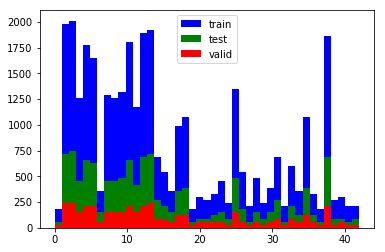

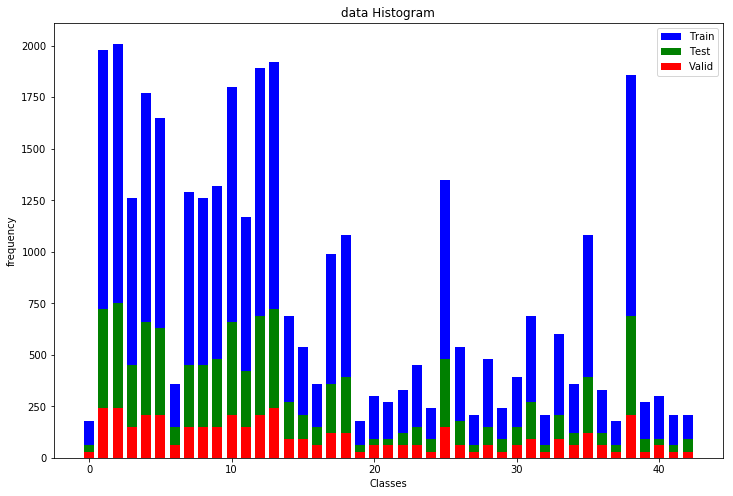

Training...

EPOCH 1 ...
Validation Accuracy = 0.881

EPOCH 2 ...
Validation Accuracy = 0.926

EPOCH 3 ...
Validation Accuracy = 0.942

EPOCH 4 ...
Validation Accuracy = 0.939

EPOCH 5 ...
Validation Accuracy = 0.945

EPOCH 6 ...
Validation Accuracy = 0.950

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.954

EPOCH 11 ...
Validation Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.937

EPOCH 13 ...
Validation Accuracy = 0.960

EPOCH 14 ...
Validation Accuracy = 0.957

EPOCH 15 ...
Validation Accuracy = 0.965

EPOCH 16 ...
Validation Accuracy = 0.959

EPOCH 17 ...
Validation Accuracy = 0.965

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.966

EPOCH 21 ...
Validation Accuracy = 0.967

EPOCH 22 ...
Validation Accuracy = 0.967

EPOCH 23 ...
Validation Accuracy = 0.967

EPOCH 24 ...
Validation Accura

In [4]:
import pickle
import csv
import numpy as np
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Load pickled data
def loadData(fileName):
    with open(fileName, mode='rb') as f:
        return pickle.load(f)

def loadSeq(fileName):
    seq = loadData(fileName)
    return (seq['features'], seq['labels'])

#Plot the histogram of the training, test and validation data
def plotData(train, test, valid):
    # data to plot
    a = plt.hist(train, bins=n_classes, color='b', label='train')
    b = plt.hist(test, bins=n_classes, color='g', label='test')
    c = plt.hist(valid, bins=n_classes, color='r', label='valid')
 
    # create plot
    index = np.arange(n_classes)
    bar_width = 0.7
    plt.legend()
    plt.figure(figsize=(12,8))
    rects1 = plt.bar(index, a[0], bar_width,
                 color='b',
                 label='Train')
 
    rects2 = plt.bar(index, b[0], bar_width,
                 color='g',
                 label='Test')

    rects3 = plt.bar(index, c[0], bar_width,
                 color='r',
                 label='Valid')
 
    plt.title("data Histogram")
    plt.xlabel("Classes")
    plt.ylabel("frequency")
    plt.legend()
    plt.show()
    
#Print the stats of the test, train and valid data
def printDataStats():
    print("Number of training examples =", n_train)
    print("Number of validation examples =", n_validation)
    print("Number of testing examples =", n_test)
    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)
    plotData(y_train, y_test, y_valid)

#Apply adaptive histogram on the image
def applyAdaptiveHistogram(gray):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(gray)

##Pre-process the image data
#Convert RGB image to GrayImage
#Apply adaptive histogram and normalize data
def preProcess(X):
    gray_X=np.zeros(shape=(X.shape[0],32,32), dtype=np.uint8)
    #gray_X=np.zeros(shape=(X.shape[0],32,32))
    count = 0
    for x in X:
        gray_X[count] = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    
        gray_X[count] = applyAdaptiveHistogram(gray_X[count])
        count += 1
    assert(count == len(X))
    gray_X1=np.zeros(shape=(X.shape[0],32,32), dtype=np.float32)
    gray_X1 = (gray_X - 128.0)/128.0
    return np.reshape(gray_X1, gray_X1.shape + (1,))

def preProcessDataSeq(train, valid, test):
    return (preProcess(train), preProcess(valid), preProcess(test))

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 12],mu,sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 12, 30],mu,sigma)),
    'wd1': tf.Variable(tf.truncated_normal([750, 300],mu,sigma)),
    'out': tf.Variable(tf.truncated_normal([300, n_classes],mu,sigma))}

    biases = {
    'bc1': tf.Variable(tf.truncated_normal([12],mu,sigma)),
    'bc2': tf.Variable(tf.truncated_normal([30],mu,sigma)),
    'bd1': tf.Variable(tf.truncated_normal([300],mu,sigma)),
    'out': tf.Variable(tf.truncated_normal([n_classes],mu,sigma))}

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12 + Activation.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2: Convolutional. Input = 14x14x12. Output = 10x10x30 + Activation.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Pooling. Input = 10x10x30. Output = 5x5x30.
    conv2 = maxpool2d(conv2, k=2)

    # Flatten. Input = 5x5x30. Output = 750.
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    #fc1 = flatten(conv2)
    #conv1 = maxpool2d(conv1, k=4)
    #conv2 = maxpool2d(conv1, k=2)
    #fc1= tf.concat([flatten(conv1), flatten(conv2), flatten(conv3)], 1)
    #fc1 = flatten(fc1)
    
    # Layer 3: Fully Connected. Input = 750. Output = 300 + Activation.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Layer 4: Fully Connected. Input = 300. Output = 43 + Activation.
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])    
    return logits


#Global Parameters
dropout = 0.6
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 128


X_train, y_train = loadSeq("train.p")
X_valid, y_valid = loadSeq("valid.p")
X_test, y_test = loadSeq("test.p")

n_train = X_train.shape[0] #Number of training examples
n_validation = X_valid.shape[0] #Number of validation examples
n_test = X_test.shape[0] #Number of testing examples.
image_shape = X_train[0].shape #Shape of an traffic sign image
n_classes = len(np.unique(y_train)) #number of unique labels
printDataStats()

gray_X_train, gray_X_valid, gray_X_test  = preProcessDataSeq(X_train, X_valid, X_test)
gray_X_train, y_train = shuffle(gray_X_train, y_train)

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    print("Training...")
    print()
    for i in range(EPOCHS):
        gray_X_train, y_train = shuffle(gray_X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = gray_X_train[offset:end], y_train[offset:end]
            sess.run(training_operation,feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(gray_X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(gray_X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))